<html>
<p>So I downloaded a few files
<li>
    FY2016F_50_RevFinal.xlsx; this is the median file from 
    <a href="https://www.huduser.gov/portal/datasets/50per.html#2016"> here </a>
</li>
<li>
    FY2016F-4050-RevFinal4.xlsx; this is the Fair Market Rents (FMRs) file from 
    <a href="https://www.huduser.gov/portal/datasets/fmr.html#2016_data"> here </a>, which is supposed to be 40th percentile rent.
</li>
<li>
    final_fy2016_hypothetical_safmrs.xlsx; FMR for zip code from 
    <a href="https://www.huduser.gov/portal/datasets/fmr/smallarea/index.html#null"> here </a>.
</li>
<li>
    A nice paper by Geoff Boeing and Paul Waddell that compared the publish median FMR with actual rental price from 
    <a href="https://arxiv.org/pdf/1605.05397.pdf"> here </a>.
    There is a ratio between the two in appendix C
</li>
</p>
</html>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. See how to convert between 40th and 50th (median) percentile rent values

In [2]:
county_50 = pd.read_excel('seattle_airbnb_data.dir/FY2016F_50_RevFinal.xlsx')
county_50 = county_50[county_50.state_alpha == 'WA']
county_50.head()

,fips2000,fips2010,Rent50_2,Rent50_0,Rent50_1,Rent50_3,Rent50_4,State,cbsasub,areaname,county,CouSub,countyname,county_town_name,pop2010,hu2010,state_alpha
4497,5.300200e+09,5300199999,658,430,569,936,940,53,NCNTY53001N53001,"Adams County, WA",1.0,99999,Adams County,Adams County,18728.0,6242.0,WA
4498,5.300400e+09,5300399999,775,488,579,993,1261,53,METRO30300M30300,"Lewiston, ID-WA MSA",3.0,99999,Asotin County,Asotin County,21623.0,9872.0,WA
4499,5.300600e+09,5300599999,883,575,703,1183,1542,53,METRO28420M28420,"Kennewick-Richland, WA MSA",5.0,99999,Benton County,Benton County,175177.0,68618.0,WA
4500,5.300800e+09,5300799999,831,556,621,1105,1323,53,METRO48300M48300,"Wenatchee, WA MSA",7.0,99999,Chelan County,Chelan County,72453.0,35465.0,WA
4501,5.301000e+09,5300999999,861,531,643,1249,1253,53,NCNTY53009N53009,"Clallam County, WA",9.0,99999,Clallam County,Clallam County,71404.0,35582.0,WA


In [3]:
county_40 = pd.read_excel('seattle_airbnb_data.dir/FY2016F-4050-RevFinal4.xlsx')
county_40 = county_40[county_40.state_alpha == 'WA']
county_40.head()

,fips2000,fips2010,fmr2,fmr0,fmr1,fmr3,fmr4,State,Metro_code,areaname,county,CouSub,countyname,county_town_name,pop2010,state_alpha,fmr_type,metro
4497,5.300200e+09,5300199999,658,430,569,936,940,53,NCNTY53001N53001,"Adams County, WA",1.0,99999,Adams County,Adams County,18728.0,WA,40,0
4498,5.300400e+09,5300399999,728,458,544,933,1184,53,METRO30300M30300,"Lewiston, ID-WA MSA",3.0,99999,Asotin County,Asotin County,21623.0,WA,40,1
4499,5.300600e+09,5300599999,841,547,669,1127,1468,53,METRO28420M28420,"Kennewick-Richland, WA MSA",5.0,99999,Benton County,Benton County,175177.0,WA,40,1
4500,5.300800e+09,5300799999,791,529,591,1052,1260,53,METRO48300M48300,"Wenatchee, WA MSA",7.0,99999,Chelan County,Chelan County,72453.0,WA,40,1
4501,5.301000e+09,5300999999,788,486,589,1143,1147,53,NCNTY53009N53009,"Clallam County, WA",9.0,99999,Clallam County,Clallam County,71404.0,WA,40,0


In [4]:
county_50 = county_50[["Rent50_0", "Rent50_1", "Rent50_2", "Rent50_3", "Rent50_4", "countyname"]]
county_50.columns = ['0b_50', '1b_50', '2b_50', '3b_50', '4b_50', 'countyname']
county_50.head()

,0b_50,1b_50,2b_50,3b_50,4b_50,countyname
4497,430,569,658,936,940,Adams County
4498,488,579,775,993,1261,Asotin County
4499,575,703,883,1183,1542,Benton County
4500,556,621,831,1105,1323,Chelan County
4501,531,643,861,1249,1253,Clallam County


In [5]:
county_40 = county_40[["fmr0", "fmr1", "fmr2", "fmr3", "fmr4", "countyname"]]
county_40.columns = ['0b_40', '1b_40', '2b_40', '3b_40', '4b_40', 'countyname']
county_40.head()

,0b_40,1b_40,2b_40,3b_40,4b_40,countyname
4497,430,569,658,936,940,Adams County
4498,458,544,728,933,1184,Asotin County
4499,547,669,841,1127,1468,Benton County
4500,529,591,791,1052,1260,Chelan County
4501,486,589,788,1143,1147,Clallam County


In [6]:
county_combine = pd.merge(how='left', left=county_40, right=county_50, on='countyname')
county_combine

,0b_40,1b_40,2b_40,3b_40,4b_40,countyname,0b_50,1b_50,2b_50,3b_50,4b_50
0,430,569,658,936,940,Adams County,430,569,658,936,940
1,458,544,728,933,1184,Asotin County,488,579,775,993,1261
2,547,669,841,1127,1468,Benton County,575,703,883,1183,1542
3,529,591,791,1052,1260,Chelan County,556,621,831,1105,1323
4,486,589,788,1143,1147,Clallam County,531,643,861,1249,1253
5,886,1021,1208,1757,2109,Clark County,965,1111,1315,1912,2296
6,548,598,800,1166,1303,Columbia County,563,615,823,1199,1340
7,482,606,748,1090,1306,Cowlitz County,515,649,800,1166,1397
8,529,591,791,1052,1260,Douglas County,556,621,831,1105,1323
9,548,551,738,959,1201,Ferry County,586,589,789,1025,1284


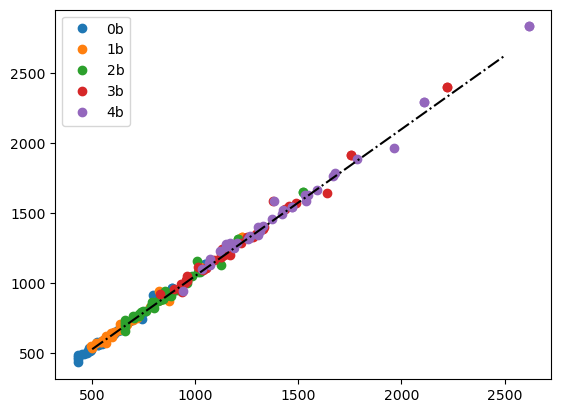

In [7]:
plt.plot(county_combine['0b_40'], county_combine['0b_50'], 'o', label='0b')
plt.plot(county_combine['1b_40'], county_combine['1b_50'], 'o', label='1b')
plt.plot(county_combine['2b_40'], county_combine['2b_50'], 'o', label='2b')
plt.plot(county_combine['3b_40'], county_combine['3b_50'], 'o', label='3b')
plt.plot(county_combine['4b_40'], county_combine['4b_50'], 'o', label='4b')
x = np.linspace(500, 2500, 100);
y = x * 1.05
plt.plot(x, y, 'k-.')
plt.legend()

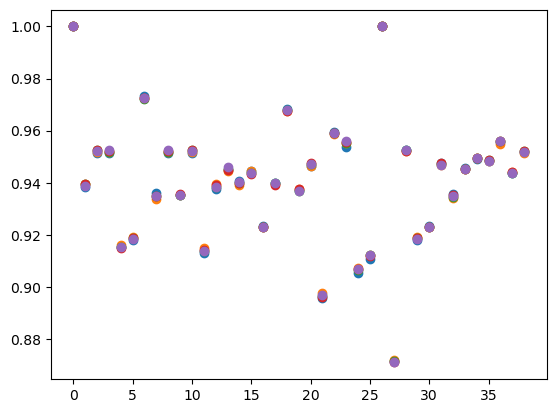

In [8]:
plt.plot(county_combine['0b_40'] / county_combine['0b_50'], 'o', label='0b')
plt.plot(county_combine['1b_40'] / county_combine['1b_50'], 'o', label='1b')
plt.plot(county_combine['2b_40'] / county_combine['2b_50'], 'o', label='2b')
plt.plot(county_combine['3b_40'] / county_combine['3b_50'], 'o', label='3b')
plt.plot(county_combine['4b_40'] / county_combine['4b_50'], 'o', label='4b')

### so converting from fmr to median, just add a 5%

### 2. Double check the zip code file is consistent with the FMR file

In [9]:
zipcode_40 = pd.read_excel('seattle_airbnb_data.dir/final_fy2016_hypothetical_safmrs.xlsx')
zipcode_40 = zipcode_40[zipcode_40.statename == 'Washington']

In [10]:
zipcode_40

,zip_code,metro_code,metro_name,fips_state_code,fips_county_code,county_name,area_rent_br0,area_rent_br1,area_rent_br2,area_rent_br3,area_rent_br4,statename
2310,98220,13380,"Bellingham, WA MSA",53,73,Whatcom County,620,710,910,1330,1590,Washington
2311,98225,13380,"Bellingham, WA MSA",53,73,Whatcom County,580,670,850,1240,1480,Washington
2312,98226,13380,"Bellingham, WA MSA",53,73,Whatcom County,660,760,970,1410,1690,Washington
2313,98227,13380,"Bellingham, WA MSA",53,73,Whatcom County,620,710,910,1330,1590,Washington
2314,98228,13380,"Bellingham, WA MSA",53,73,Whatcom County,620,710,910,1330,1590,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...
26805,98948,49420,"Yakima, WA MSA",53,77,Yakima County,500,580,740,1020,1160,Washington
26806,98951,49420,"Yakima, WA MSA",53,77,Yakima County,450,510,660,910,1040,Washington
26807,98952,49420,"Yakima, WA MSA",53,77,Yakima County,510,590,760,1050,1200,Washington
26808,98953,49420,"Yakima, WA MSA",53,77,Yakima County,610,700,900,1240,1420,Washington


In [11]:
zipcode_40_by_county = zipcode_40.groupby('county_name')\
            [['area_rent_br0','area_rent_br1','area_rent_br2','area_rent_br3','area_rent_br4']].agg('mean')
zipcode_40_by_county.reset_index(inplace=True)
zipcode_40_by_county.columns = ['countyname','0b_40_mean','1b_40_mean','2b_40_mean','3b_40_mean','4b_40_mean']
zipcode_40_by_county

,countyname,0b_40_mean,1b_40_mean,2b_40_mean,3b_40_mean,4b_40_mean
0,Asotin County,486.666667,536.666667,716.666667,916.666667,1183.333333
1,Benton County,542.500000,653.333333,802.500000,1099.166667,1400.833333
2,Chelan County,532.666667,571.333333,764.000000,1026.666667,1170.000000
3,Clark County,932.916667,1041.250000,1227.083333,1786.666667,2142.916667
4,Columbia County,561.666667,613.333333,821.666667,1196.666667,1361.666667
5,Cowlitz County,524.166667,642.500000,789.166667,1149.166667,1377.500000
6,Douglas County,507.857143,542.142857,726.428571,977.857143,1112.857143
7,Franklin County,514.444444,618.888889,760.000000,1043.333333,1327.777778
8,King County,943.454545,1060.181818,1302.636364,1899.272727,2262.181818
9,Kitsap County,671.600000,840.400000,1087.600000,1544.000000,1802.000000


In [12]:
combine_check = pd.merge(how='left', left=county_40, right=zipcode_40_by_county, on='countyname')

In [13]:
combine_check

,0b_40,1b_40,2b_40,3b_40,4b_40,countyname,0b_40_mean,1b_40_mean,2b_40_mean,3b_40_mean,4b_40_mean
0,430,569,658,936,940,Adams County,NaN,NaN,NaN,NaN,NaN
1,458,544,728,933,1184,Asotin County,486.666667,536.666667,716.666667,916.666667,1183.333333
2,547,669,841,1127,1468,Benton County,542.500000,653.333333,802.500000,1099.166667,1400.833333
3,529,591,791,1052,1260,Chelan County,532.666667,571.333333,764.000000,1026.666667,1170.000000
4,486,589,788,1143,1147,Clallam County,NaN,NaN,NaN,NaN,NaN
5,886,1021,1208,1757,2109,Clark County,932.916667,1041.250000,1227.083333,1786.666667,2142.916667
6,548,598,800,1166,1303,Columbia County,561.666667,613.333333,821.666667,1196.666667,1361.666667
7,482,606,748,1090,1306,Cowlitz County,524.166667,642.500000,789.166667,1149.166667,1377.500000
8,529,591,791,1052,1260,Douglas County,507.857143,542.142857,726.428571,977.857143,1112.857143
9,548,551,738,959,1201,Ferry County,NaN,NaN,NaN,NaN,NaN


### strange to see NaN here

In [14]:
combine_check.dropna(axis=0, inplace=True)
combine_check

,0b_40,1b_40,2b_40,3b_40,4b_40,countyname,0b_40_mean,1b_40_mean,2b_40_mean,3b_40_mean,4b_40_mean
1,458,544,728,933,1184,Asotin County,486.666667,536.666667,716.666667,916.666667,1183.333333
2,547,669,841,1127,1468,Benton County,542.500000,653.333333,802.500000,1099.166667,1400.833333
3,529,591,791,1052,1260,Chelan County,532.666667,571.333333,764.000000,1026.666667,1170.000000
5,886,1021,1208,1757,2109,Clark County,932.916667,1041.250000,1227.083333,1786.666667,2142.916667
6,548,598,800,1166,1303,Columbia County,561.666667,613.333333,821.666667,1196.666667,1361.666667
7,482,606,748,1090,1306,Cowlitz County,524.166667,642.500000,789.166667,1149.166667,1377.500000
8,529,591,791,1052,1260,Douglas County,507.857143,542.142857,726.428571,977.857143,1112.857143
10,547,669,841,1127,1468,Franklin County,514.444444,618.888889,760.000000,1043.333333,1327.777778
16,1049,1225,1523,2220,2617,King County,943.454545,1060.181818,1302.636364,1899.272727,2262.181818
17,626,779,1015,1454,1678,Kitsap County,671.600000,840.400000,1087.600000,1544.000000,1802.000000


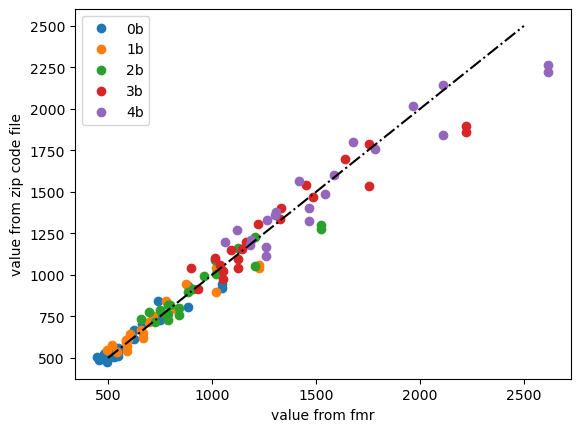

In [15]:
plt.plot(combine_check['0b_40'], combine_check['0b_40_mean'], 'o', label='0b')
plt.plot(combine_check['1b_40'], combine_check['1b_40_mean'], 'o', label='1b')
plt.plot(combine_check['2b_40'], combine_check['2b_40_mean'], 'o', label='2b')
plt.plot(combine_check['3b_40'], combine_check['3b_40_mean'], 'o', label='3b')
plt.plot(combine_check['4b_40'], combine_check['4b_40_mean'], 'o', label='4b')
x = np.linspace(500, 2500, 100);
y = x * 1.00
plt.plot(x, y, 'k-.')
plt.xlabel('value from fmr')
plt.ylabel('value from zip code file')
plt.legend()

### looks good enough that the two are indeed align on a 1-1 line

### 3. Finally, construct a table with estimated rent for each zipcode in the listings

In [16]:
listings = pd.read_csv('seattle_airbnb_data.dir/listings.csv')

In [17]:
listings.zipcode.value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64

fix the funny one with 99\n98122

In [18]:
pd.set_option('display.max_columns', 200)

In [19]:
listings[listings.zipcode == '98122']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
572,10035644,https://www.airbnb.com/rooms/10035644,20160104002432,2016-01-04,Cozy Capitol Hill 1 BD Apartment,Nice apartment in a quiet neighborhood. On wes...,NaN,Nice apartment in a quiet neighborhood. On wes...,none,NaN,NaN,You are three blocks from the bus stop.,https://a2.muscache.com/ac/pictures/a984d2ed-1...,https://a2.muscache.com/im/pictures/a984d2ed-1...,https://a2.muscache.com/ac/pictures/a984d2ed-1...,https://a2.muscache.com/ac/pictures/a984d2ed-1...,5246897,https://www.airbnb.com/users/show/5246897,Tom,2013-02-27,"Seattle, Washington, United States","I have lived in Seattle for about 10 years, ha...",within a few hours,100%,100%,f,https://a1.muscache.com/ac/users/5246897/profi...,https://a1.muscache.com/ac/users/5246897/profi...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"East Denny Way, Seattle, WA 98122, United States",NaN,Mann,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.620016,-122.299805,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",NaN,$90.00,NaN,NaN,NaN,NaN,1,$0.00,2,1125,3 weeks ago,t,1,1,3,278,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,1,NaN
573,8293287,https://www.airbnb.com/rooms/8293287,20160104002432,2016-01-04,Modern private room and bath,Modern first floor bedroom with private bathro...,The guest bedroom has a private entrance for g...,Modern first floor bedroom with private bathro...,none,NaN,"There's easy parking on the street, and it's e...",NaN,https://a1.muscache.com/ac/pictures/107012229/...,https://a1.muscache.com/im/pictures/107012229/...,https://a1.muscache.com/ac/pictures/107012229/...,https://a1.muscache.com/ac/pictures/107012229/...,295367,https://www.airbnb.com/users/show/295367,Bede,2010-11-22,"Seattle, Washington, United States",I love to play in the mountains of Washington ...,within an hour,100%,100%,f,https://a2.muscache.com/ac/users/295367/profil...,https://a2.muscache.com/ac/users/295367/profil...,Minor,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"24th Avenue, Seattle, WA 98122, United States",Minor,Mann,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.613320,-122.300567,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",NaN,$88.00,$450.00,"$1,800.00",NaN,$30.00,1,$0.00,2,15,2 weeks ago,t,30,60,89,89,2016-01-04,8,2015-09-15,2015-11-16,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,t,moderate,f,f,1,2.14
574,910784,https://www.airbnb.com/rooms/910784,20160104002432,2016-01-04,Modern 2

In [20]:
listings[listings.zipcode == '99\n98122']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
859,9448215,https://www.airbnb.com/rooms/9448215,20160104002432,2016-01-04,Capital hill,"Large room in Seattle's best neighborhood, ca...",NaN,"Large room in Seattle's best neighborhood, ca...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/021fb137-4...,https://a2.muscache.com/im/pictures/021fb137-4...,https://a2.muscache.com/ac/pictures/021fb137-4...,https://a2.muscache.com/ac/pictures/021fb137-4...,48441443,https://www.airbnb.com/users/show/48441443,Savannah,2015-11-07,US,NaN,within a day,60%,100%,f,https://a2.muscache.com/ac/pictures/6beda013-2...,https://a2.muscache.com/ac/pictures/6beda013-2...,NaN,3.0,3.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"14th Ave, Seattle, WA 99\n98122, United States",NaN,Minor,Central Area,Seattle,WA,99\n98122,Seattle,"Seattle, WA",US,United States,47.611079,-122.31282,f,House,Private room,2,1.0,1.0,1.0,Real Bed,{},NaN,$67.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,2 weeks ago,t,30,60,90,365,2016-01-04,1,2015-12-12,2015-12-12,100.0,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,flexible,f,f,3,1.0


so safe to say that's a type

In [21]:
listings.zipcode.isna().sum()

7

In [22]:
zipcodes = listings.zipcode.dropna().unique()
zipcodes = list(zipcodes)
zipcodes.remove('99\n98122')
zipcodes = list(map(int, zipcodes))
zipcodes

[98119,
 98109,
 98107,
 98117,
 98103,
 98105,
 98115,
 98101,
 98122,
 98112,
 98144,
 98121,
 98102,
 98199,
 98104,
 98134,
 98136,
 98126,
 98146,
 98116,
 98177,
 98118,
 98108,
 98133,
 98106,
 98178,
 98125]

In [23]:
zipcode_40.head()

,zip_code,metro_code,metro_name,fips_state_code,fips_county_code,county_name,area_rent_br0,area_rent_br1,area_rent_br2,area_rent_br3,area_rent_br4,statename
2310,98220,13380,"Bellingham, WA MSA",53,73,Whatcom County,620,710,910,1330,1590,Washington
2311,98225,13380,"Bellingham, WA MSA",53,73,Whatcom County,580,670,850,1240,1480,Washington
2312,98226,13380,"Bellingham, WA MSA",53,73,Whatcom County,660,760,970,1410,1690,Washington
2313,98227,13380,"Bellingham, WA MSA",53,73,Whatcom County,620,710,910,1330,1590,Washington
2314,98228,13380,"Bellingham, WA MSA",53,73,Whatcom County,620,710,910,1330,1590,Washington


In [24]:
rent_ref = pd.DataFrame(zipcodes, columns=['zip_code'])
rent_ref = pd.merge(left=rent_ref, right=zipcode_40[['zip_code','area_rent_br0','area_rent_br1','area_rent_br2','area_rent_br3','area_rent_br4']], on='zip_code')
rent_ref.columns = ['zip_code','br0','br1','br2','br3','br4']
rent_ref[['br0','br1','br2','br3','br4']] *= 1.05
rent_ref['br0_adjusted'] = rent_ref['br0'] * 1.2  # the appendix itself missing br0
rent_ref['br1_adjusted'] = rent_ref['br1'] * 1.2
rent_ref['br2_adjusted'] = rent_ref['br2'] * 1.05
rent_ref['br3_adjusted'] = rent_ref['br3'] * 0.90
rent_ref['br4_adjusted'] = rent_ref['br4'] * 1.0
rent_ref

,zip_code,br0,br1,br2,br3,br4,br0_adjusted,br1_adjusted,br2_adjusted,br3_adjusted,br4_adjusted
0,98119,924.0,1039.5,1270.5,1848.0,2205.0,1108.8,1247.4,1334.025,1663.20,2205.0
1,98109,1008.0,1134.0,1396.5,2037.0,2425.5,1209.6,1360.8,1466.325,1833.30,2425.5
2,98107,955.5,1081.5,1323.0,1932.0,2299.5,1146.6,1297.8,1389.150,1738.80,2299.5
3,98117,987.0,1113.0,1365.0,1984.5,2373.0,1184.4,1335.6,1433.250,1786.05,2373.0
4,98103,955.5,1081.5,1323.0,1932.0,2299.5,1146.6,1297.8,1389.150,1738.80,2299.5
5,98105,903.0,1018.5,1249.5,1816.5,2173.5,1083.6,1222.2,1311.975,1634.85,2173.5
6,98115,1008.0,1134.0,1396.5,2037.0,2425.5,1209.6,1360.8,1466.325,1833.30,2425.5
7,98101,934.5,1050.0,1291.5,1879.5,2247.0,1121.4,1260.0,1356.075,1691.55,2247.0
8,98122,871.5,987.0,1207.5,1764.0,2100.0,1045.8,1184.4,1267.875,1587.60,2100.0
9,98112,1029.0,1165.5,1428.0,2079.0,2478.0,1234.8,1398.6,1499.400,1871.10,2478.0


In [25]:
rent_ref.to_csv('rent_ref.csv', index=False)

### randomly choose 1 zipcode to make sure

In [26]:
zipcode_40.loc[zipcode_40.zip_code==98103,['zip_code','area_rent_br0','area_rent_br1','area_rent_br2','area_rent_br3','area_rent_br4']]

,zip_code,area_rent_br0,area_rent_br1,area_rent_br2,area_rent_br3,area_rent_br4
23121,98103,910,1030,1260,1840,2190


In [27]:
rent_ref.loc[rent_ref.zip_code==98103]

,zip_code,br0,br1,br2,br3,br4,br0_adjusted,br1_adjusted,br2_adjusted,br3_adjusted,br4_adjusted
4,98103,955.5,1081.5,1323.0,1932.0,2299.5,1146.6,1297.8,1389.15,1738.8,2299.5


In [28]:
910*1.05, 1030*1.05, 1260*1.05, 1840*1.05, 2190*1.05

(955.5, 1081.5, 1323.0, 1932.0, 2299.5)

### looks good